# Investigating the Asgard Membrane Proteome
#### Of the 9003 Asgard proteins with TMR regions, ~54% didn't map to orthogroups via EggNog. 
This notebook is further investigating these predicted TMR proteins and looking into results from Foldseek clustering

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
all_prot_db = '/stor/work/Marcotte/project/drbarth/asgard/Guaymas_D4994_C39_H1_prots_TMRs.tsv'
annot_tmrs_fp = '/stor/work/Marcotte/project/drbarth/asgard/Guaymas_D4994_C39_H1_Asgardprots_with_TMRs_orthoannotated.tsv'
#Taxonomy filepath

cluster_fp = '/stor/work/Marcotte/project/drbarth/asgard/membrane_proteome/clustering/asgard_61323_cluster.tsv'

#### Do the number of TMRs change significantly between the different Asgard families?

In [12]:
#Read in df containing all of the Asgard proteins with corresponding TMR regions
all_prot_df = pd.read_csv(all_prot_db, sep='\t', header=0)
all_prot_df.head()

,ProteinID,Bin,Taxonomy,Num_predicted_TMRs,aa_sequence,DeepTMHMM_prediction
0,D4994_C39_H1_Bin_33_scaffold_101747_1,D4994_C39_H1_Bin_33,Lokiarchaeota,1,MITRSRGNESRSFNRSTSPNSRSSSSSRSNLDSDSDSDSDSYSNDI...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...
1,D4994_C39_H1_Bin_33_scaffold_101747_2,D4994_C39_H1_Bin_33,Lokiarchaeota,0,MEEYLIHKGPVSCWDEKTKGEVIALMYHKIIVTVEWYKKNPTNEEF...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...
2,D4994_C39_H1_Bin_33_scaffold_101747_3,D4994_C39_H1_Bin_33,Lokiarchaeota,0,MKPQFFIGNNVYAMIKAFTKNNKTQGVLTVVPNTVRPDKICSGRFM...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...
3,D4994_C39_H1_Bin_33_scaffold_102981_1,D4994_C39_H1_Bin_33,Lokiarchaeota,1,MKKNTFTVVTLSVLVLAVMIPMTFPGNDTRVEDQVAMQPDAPVTSY...,SSSSSSSSSSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOO...
4,D4994_C39_H1_Bin_33_scaffold_102981_10,D4994_C39_H1_Bin_33,Lokiarchaeota,0,MVEEEREDREEEEGEEGEEEEEGDNLGELVDGGITEDNLANVTGDD...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...


In [13]:
all_prot_df['Taxonomy']

0           Lokiarchaeota
1           Lokiarchaeota
2           Lokiarchaeota
3           Lokiarchaeota
4           Lokiarchaeota
               ...       
50974    Heimdallarchaeia
50975    Heimdallarchaeia
50976    Heimdallarchaeia
50977    Heimdallarchaeia
50978    Heimdallarchaeia
Name: Taxonomy, Length: 50979, dtype: object

In [14]:
#For every Bin aggregate the number of proteins with TMRs
bin_prots = all_prot_df['Bin'].value_counts().reset_index(name='Num_prots')
bin_prots = pd.DataFrame(bin_prots)

#test isn't necessarily in the same order as bin_prots
test = all_prot_df[(all_prot_df['Num_predicted_TMRs'] == 0)].groupby('Bin').size().reset_index(name='No_TMRs')
#make test into a dataframe
test = pd.DataFrame(test)
#merge the two dataframes
all_prots_counts = bin_prots.merge(test, left_on='index', right_on='Bin', how='left')
print(f'Is this: {bin_prots.shape[0]} the same as this: {test.shape[0]}, and this: {all_prots_counts.shape[0]}?')


Is this: 16 the same as this: 16, and this: 16?


In [15]:
#Make a new column that is the subtraction of the two to get the number of proteins with TMRs
all_prots_counts['Num_TMRs'] = all_prots_counts['Num_prots'] - all_prots_counts['No_TMRs']
all_prots_counts.head()
#Drop the index column 
all_prots_counts = all_prots_counts.drop(columns=['index'])
all_prots_counts.head()

,Num_prots,Bin,No_TMRs,Num_TMRs
0,5536,D4994_C39_H1_Bin_33,4566,970
1,4529,D4994_C39_H1_Bin_319,3692,837
2,3967,D4994_C39_H1_Bin_733,3278,689
3,3960,D4994_C39_H1_Bin_335,3325,635
4,3687,D4994_C39_H1_Bin_188,2999,688


In [16]:
#Make the Taxonomy column
tax = all_prot_df.groupby('Bin')['Taxonomy'].first().reset_index(name='Taxonomy')
#Join on the Taxonomy column to the all_prots_counts df
all_prots_counts_tax = all_prots_counts.merge(tax, on='Bin', how='left')
all_prots_counts_tax.head()


,Num_prots,Bin,No_TMRs,Num_TMRs,Taxonomy
0,5536,D4994_C39_H1_Bin_33,4566,970,Lokiarchaeota
1,4529,D4994_C39_H1_Bin_319,3692,837,Lokiarchaeota
2,3967,D4994_C39_H1_Bin_733,3278,689,Lokiarchaeota
3,3960,D4994_C39_H1_Bin_335,3325,635,Lokiarchaeota
4,3687,D4994_C39_H1_Bin_188,2999,688,Lokiarchaeota


In [17]:

#Create a column with the percentage of proteins with TMRs in each Bin
all_prots_counts_tax['Percent_TMRs'] = (all_prots_counts_tax['Num_TMRs']/all_prots_counts_tax['Num_prots'])*100
all_prots_counts_tax
#Okay so really not that much of a difference here honestly. Might be more once I incorporate all of the other bins though. 
#Also maybe with some granularity into the different broad categories of the proteins or types, there might be some patterns that appear! 

,Num_prots,Bin,No_TMRs,Num_TMRs,Taxonomy,Percent_TMRs
0,5536,D4994_C39_H1_Bin_33,4566,970,Lokiarchaeota,17.521676
1,4529,D4994_C39_H1_Bin_319,3692,837,Lokiarchaeota,18.480901
2,3967,D4994_C39_H1_Bin_733,3278,689,Lokiarchaeota,17.368288
3,3960,D4994_C39_H1_Bin_335,3325,635,Lokiarchaeota,16.035354
4,3687,D4994_C39_H1_Bin_188,2999,688,Lokiarchaeota,18.660157
5,3655,D4994_C39_H1_Bin_674,3040,615,Helarchaeota,16.826265
6,3608,D4994_C39_H1_Bin_261,2854,754,Lokiarchaeota,20.898004
7,3283,D4994_C39_H1_Bin_37,2793,490,Lokiarchaeota,14.925373
8,3099,D4994_C39_H1_Bin_371,2597,502,Lokiarchaeota,16.198774
9,3029,D4994_C39_H1_Bin_316,2398,631,Heimdallarchaeia,20.831958


<Axes: title={'center': 'Percentages of Proteins with TMRs by Taxonomy'}, xlabel='Taxonomy'>

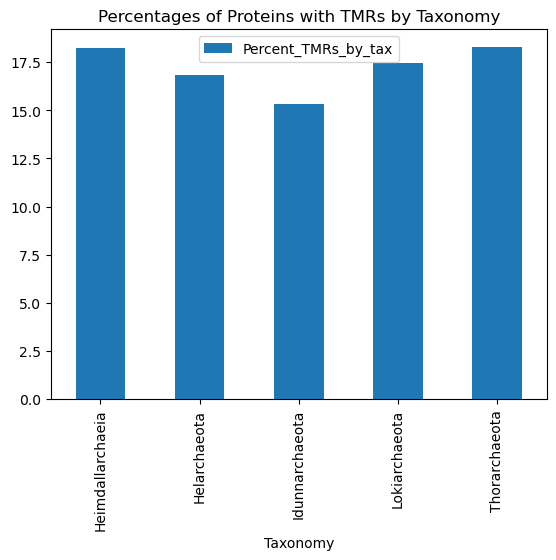

In [18]:
#Aggregate the number of proteins with TMRs by taxonomy
tax_tmr_prots = all_prots_counts_tax.groupby('Taxonomy')['Percent_TMRs'].mean().reset_index(name='Percent_TMRs_by_tax')
tax_tmr_prots.plot(kind='bar', title='Percentages of Proteins with TMRs by Taxonomy', x='Taxonomy', y='Percent_TMRs_by_tax')

In [19]:
#Read in the dataframe containing all of the Asgards with TMR regions with the orthogroup (Eggnog) annotations
ortho_tmrs = pd.read_csv(annot_tmrs_fp, delimiter='\t')
ortho_tmrs.shape

(9003, 35)

In [20]:
#Clean up the dataframe: drop Bin_y, Genomes (Dive_Core_Horizon_Bin), and Sample (Dive_Core_Horizon)
ortho_tmrs.drop(['Bin_y', 'Genomes (Dive_Core_Horizon_Bin)', 'Sample (Dive_Core_Horizon)'], axis=1, inplace=True)
#Rename Bin_x to Bin 
ortho_tmrs.rename(columns={'Bin_x':'Bin'}, inplace=True)

In [21]:
#ortho_tmrs.columns

In [22]:
#Count the length of the AA sequence for each protein and add column containing the length
ortho_tmrs['AA_length'] = ortho_tmrs['aa_sequence'].str.len()
#Create a new column with the AA_length appended to the protein name and then '_unrelaxed_rank_001_alphafold2_ptm_model_1_seed_000.pdb' appended to the end
ortho_tmrs['PDB_name'] = ortho_tmrs['AA_length'].astype(str) + '_' + ortho_tmrs['ProteinID'] + '_unrelaxed_rank_001_alphafold2_ptm_model_1_seed_000.pdb'
#ortho_tmrs.head()

In [23]:
#Make a copy of ortho_tmrs with pdb filenames attached
master = ortho_tmrs
master.head()

,ProteinID,Num_predicted_TMRs,aa_sequence,DeepTMHMM_prediction,Bin,#query,seed_ortholog,evalue,score,eggNOG_OGs,...,BiGG_Reaction,PFAMs,Taxonomy,CheckM Marker v1.1.3,CheckM Completeness v1.1.3,CheckM Contamination v1.1.3,GTDB-Tk v1.5.1 Classification,Value,AA_length,PDB_name
0,D4994_C39_H1_Bin_33_scaffold_101747_1,1,MITRSRGNESRSFNRSTSPNSRSSSSSRSNLDSDSDSDSDSYSNDI...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,D4994_C39_H1_Bin_33,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,312,312_D4994_C39_H1_Bin_33_scaffold_101747_1_unre...
1,D4994_C39_H1_Bin_33_scaffold_102981_1,1,MKKNTFTVVTLSVLVLAVMIPMTFPGNDTRVEDQVAMQPDAPVTSY...,SSSSSSSSSSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOO...,D4994_C39_H1_Bin_33,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,608,608_D4994_C39_H1_Bin_33_scaffold_102981_1_unre...
2,D4994_C39_H1_Bin_33_scaffold_102981_15,13,MPSLSVKIKRFFQEGIERSRSSMKISAANIIVAIALLLVFTCAVFI...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIMMMMMMMMMMMMMMMMM...,D4994_C39_H1_Bin_33,D4994_C39_H1_Bin_33_scaffold_102981_15,4006.Lus10041985,2.030000e-80,289.0,"COG1287@1|root,KOG2292@2759|Eukaryota,37M0F@33...",...,-,STT3,Lokiarchaeota,k__Archaea (UID2),92.52,6.25,d__Archaea;p__Asgardarchaeota;c__Lokiarchaeia;...,1.0,1324,1324_D4994_C39_H1_Bin_33_scaffold_102981_15_un...
3,D4994_C39_H1_Bin_33_scaffold_102981_16,8,MQTVILLPFFFIGIGLIGITFAQPLATSGLLVFVLGSFFILKERLE...,IIMMMMMMMMMMMMMMMOOMMMMMMMMMMMMMMMMMMMMMIIIIII...,D4994_C39_H1_Bin_33,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,235,235_D4994_C39_H1_Bin_33_scaffold_102981_16_unr...
4,D4994_C39_H1_Bin_33_scaffold_102981_2,1,MVQRHKRKFGALTFMLLVSISGMISISINTYNPKAASNSRDFVAAE...,SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSOOOOOOOOOOO...,D4994_C39_H1_Bin_33,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1177,1177_D4994_C39_H1_Bin_33_scaffold_102981_2_unr...


In [24]:
#Read in the cluster tsvs
cluster = pd.read_csv(cluster_fp, delimiter='\t', header=None)
#Rename columns 
cluster.rename(columns={0:'Cluster_Representative', 1:'Cluster_Member'}, inplace=True)
cluster.head()

,Cluster_Representative,Cluster_Member
0,595_D4994_C39_H1_Bin_122_scaffold_411408_2_unr...,595_D4994_C39_H1_Bin_122_scaffold_411408_2_unr...
1,59_D4994_C39_H1_Bin_225_scaffold_718161_11_unr...,59_D4994_C39_H1_Bin_225_scaffold_718161_11_unr...
2,59_D4994_C39_H1_Bin_316_scaffold_159839_2_unre...,59_D4994_C39_H1_Bin_316_scaffold_159839_2_unre...
3,59_D4994_C39_H1_Bin_319_scaffold_195277_6_unre...,59_D4994_C39_H1_Bin_319_scaffold_195277_6_unre...
4,59_D4994_C39_H1_Bin_319_scaffold_490360_11_unr...,59_D4994_C39_H1_Bin_319_scaffold_490360_11_unr...


In [25]:
#Groupby Cluster_Representative and create a list of Cluster_Members
clustered = cluster.groupby('Cluster_Representative')['Cluster_Member'].apply(list).reset_index()
clustered.head()


,Cluster_Representative,Cluster_Member
0,100_D4994_C39_H1_Bin_122_scaffold_326895_1_unr...,[100_D4994_C39_H1_Bin_122_scaffold_326895_1_un...
1,100_D4994_C39_H1_Bin_319_scaffold_293447_12_un...,[100_D4994_C39_H1_Bin_319_scaffold_293447_12_u...
2,100_D4994_C39_H1_Bin_335_scaffold_474236_18_un...,[100_D4994_C39_H1_Bin_335_scaffold_474236_18_u...
3,100_D4994_C39_H1_Bin_371_scaffold_638796_1_unr...,[100_D4994_C39_H1_Bin_371_scaffold_638796_1_un...
4,1010_D4994_C39_H1_Bin_33_scaffold_430830_1_unr...,[1010_D4994_C39_H1_Bin_33_scaffold_430830_1_un...


Text(0.5, 0, 'Number of Cluster Members')

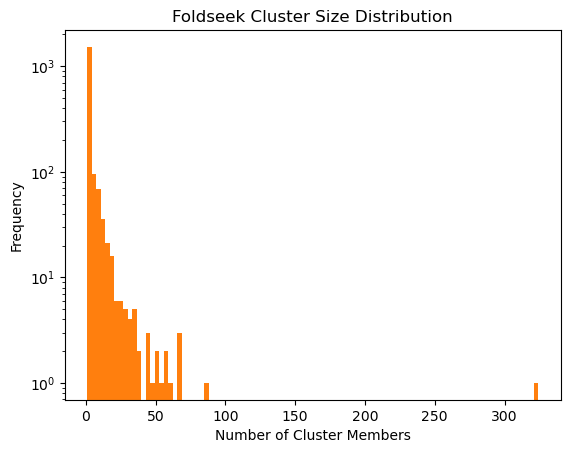

In [26]:
#Plot the length of the cluster_member list for each cluster_representative on log scale
clustered['Cluster_Member'].str.len().plot.hist(bins=100)
#From looking at this graph -- I think I want to filter out the clusters with less than 10 members
plt = clustered['Cluster_Member'].str.len().plot.hist(bins=100, log=True)

#Add title and axis labels
plt.set_title("Foldseek Cluster Size Distribution")
plt.set_xlabel("Number of Cluster Members")




In [17]:
#Which cluster has more than 100 members?
biggest_cluster = clustered[clustered['Cluster_Member'].str.len() > 100]
biggest_cluster['Cluster_Representative'].to_list()

['438_D4994_C39_H1_Bin_371_scaffold_541143_40_unrelaxed_rank_001_alphafold2_ptm_model_1_seed_000.pdb']

In [18]:
#This is a Loki Protein and it DOES match an orthogroup -- in bacteria, but what is it? PFAM is MFS_1 -- it is a Major Facilitator Superfamily, one of the two largest transport families found on Earth! 
master[master['PDB_name']=='438_D4994_C39_H1_Bin_371_scaffold_541143_40_unrelaxed_rank_001_alphafold2_ptm_model_1_seed_000.pdb']

,ProteinID,Num_predicted_TMRs,aa_sequence,DeepTMHMM_prediction,Bin,#query,seed_ortholog,evalue,score,eggNOG_OGs,...,BiGG_Reaction,PFAMs,Taxonomy,CheckM Marker v1.1.3,CheckM Completeness v1.1.3,CheckM Contamination v1.1.3,GTDB-Tk v1.5.1 Classification,Value,AA_length,PDB_name
6528,D4994_C39_H1_Bin_371_scaffold_541143_40,12,MSESEKKEKLDVKHTFFIGLAFFTTGISWSMYNTQVNITLFQYLGL...,IIIIIIIIIIIIIIIMMMMMMMMMMMMMMMMMMMMMOOOOOOOOOO...,D4994_C39_H1_Bin_371,D4994_C39_H1_Bin_371_scaffold_541143_40,521045.Kole_1041,1.080000e-79,259.0,"COG2211@1|root,COG2211@2|Bacteria,2GCM3@200918...",...,-,MFS_1,Lokiarchaeota,k__Archaea (UID2),79.13,1.4,d__Archaea;p__Asgardarchaeota;c__Lokiarchaeia;...,1.0,438,438_D4994_C39_H1_Bin_371_scaffold_541143_40_un...


In [19]:
#Mid-size clusters, there are 11 either with 50 or above members
singles = clustered[clustered['Cluster_Member'].str.len() == 1]
one_up =  clustered[clustered['Cluster_Member'].str.len() > 1]
one_to_ten = one_up[one_up['Cluster_Member'].str.len() < 10]
ten_up = clustered[clustered['Cluster_Member'].str.len() >= 10]
ten_to_fifty = ten_up[ten_up['Cluster_Member'].str.len() < 50]
mid_clusters = clustered[clustered['Cluster_Member'].str.len() >= 50]
print(f'{singles.shape[0]} have only one member, {one_to_ten.shape[0]} have between two and nine members, {ten_to_fifty.shape[0]} have between ten and fifty, {mid_clusters.shape[0]} have fifty or more members including one with 300+ and there are {clustered.shape[0]} clusters in total')

1125 have only one member, 544 have between two and nine members, 121 have between ten and fifty, 11 have fifty or more members including one with 300+ and there are 1801 clusters in total


In [21]:
#Okay, let's add on to our database: let's join the clustered database onto the master database
master_clust = master.merge(cluster, left_on='PDB_name', right_on='Cluster_Member', how='left')
#master_clust.to_csv("asgards_withclusters_752023.csv", sep='\t', index=False)
master_clust.head()

,ProteinID,Num_predicted_TMRs,aa_sequence,DeepTMHMM_prediction,Bin,#query,seed_ortholog,evalue,score,eggNOG_OGs,...,Taxonomy,CheckM Marker v1.1.3,CheckM Completeness v1.1.3,CheckM Contamination v1.1.3,GTDB-Tk v1.5.1 Classification,Value,AA_length,PDB_name,Cluster_Representative,Cluster_Member
0,D4994_C39_H1_Bin_33_scaffold_101747_1,1,MITRSRGNESRSFNRSTSPNSRSSSSSRSNLDSDSDSDSDSYSNDI...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,D4994_C39_H1_Bin_33,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,312,312_D4994_C39_H1_Bin_33_scaffold_101747_1_unre...,NaN,NaN
1,D4994_C39_H1_Bin_33_scaffold_102981_1,1,MKKNTFTVVTLSVLVLAVMIPMTFPGNDTRVEDQVAMQPDAPVTSY...,SSSSSSSSSSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOO...,D4994_C39_H1_Bin_33,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,608,608_D4994_C39_H1_Bin_33_scaffold_102981_1_unre...,NaN,NaN
2,D4994_C39_H1_Bin_33_scaffold_102981_15,13,MPSLSVKIKRFFQEGIERSRSSMKISAANIIVAIALLLVFTCAVFI...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIMMMMMMMMMMMMMMMMM...,D4994_C39_H1_Bin_33,D4994_C39_H1_Bin_33_scaffold_102981_15,4006.Lus10041985,2.030000e-80,289.0,"COG1287@1|root,KOG2292@2759|Eukaryota,37M0F@33...",...,Lokiarchaeota,k__Archaea (UID2),92.52,6.25,d__Archaea;p__Asgardarchaeota;c__Lokiarchaeia;...,1.0,1324,1324_D4994_C39_H1_Bin_33_scaffold_102981_15_un...,1305_D4994_C39_H1_Bin_371_scaffold_281418_33_u...,1324_D4994_C39_H1_Bin_33_scaffold_102981_15_un...
3,D4994_C39_H1_Bin_33_scaffold_102981_16,8,MQTVILLPFFFIGIGLIGITFAQPLATSGLLVFVLGSFFILKERLE...,IIMMMMMMMMMMMMMMMOOMMMMMMMMMMMMMMMMMMMMMIIIIII...,D4994_C39_H1_Bin_33,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,235,235_D4994_C39_H1_Bin_33_scaffold_102981_16_unr...,235_D4994_C39_H1_Bin_33_scaffold_102981_16_unr...,235_D4994_C39_H1_Bin_33_scaffold_102981_16_unr...
4,D4994_C39_H1_Bin_33_scaffold_102981_2,1,MVQRHKRKFGALTFMLLVSISGMISISINTYNPKAASNSRDFVAAE...,SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSOOOOOOOOOOO...,D4994_C39_H1_Bin_33,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1177,1177_D4994_C39_H1_Bin_33_scaffold_102981_2_unr...,NaN,NaN


In [21]:
#Take a quick look at the largest cluster
lg = master_clust[master_clust['Cluster_Representative']=='438_D4994_C39_H1_Bin_371_scaffold_541143_40_unrelaxed_rank_001_alphafold2_ptm_model_1_seed_000.pdb']
lg_noortho = lg[lg['#query'].isnull()]
print( f'There are {lg_noortho.shape[0]} members of the largest cluster that do not have orthogroup annotations')

There are 13 members of the largest cluster that do not have orthogroup annotations


In [26]:
#Let's just look at all of the other clusters with more than 50 members
morethan50_master = master_clust[master_clust['Cluster_Representative'].isin(mid_clusters['Cluster_Representative'].to_list())]
morethan50_master.head()

,ProteinID,Num_predicted_TMRs,aa_sequence,DeepTMHMM_prediction,Bin,#query,seed_ortholog,evalue,score,eggNOG_OGs,...,Taxonomy,CheckM Marker v1.1.3,CheckM Completeness v1.1.3,CheckM Contamination v1.1.3,GTDB-Tk v1.5.1 Classification,Value,AA_length,PDB_name,Cluster_Representative,Cluster_Member
32,D4994_C39_H1_Bin_33_scaffold_14647_46,4,MMGIINELAYPRYSGTEGDEVRCKEYLANKFKGLGQEPVIEPVPWS...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,D4994_C39_H1_Bin_33,D4994_C39_H1_Bin_33_scaffold_14647_46,1188233.MAU_4110,4.230000e-04,51.2,"COG2234@1|root,COG2234@2|Bacteria,3WT9Y@544448...",...,Lokiarchaeota,k__Archaea (UID2),92.52,6.25,d__Archaea;p__Asgardarchaeota;c__Lokiarchaeia;...,1.0,393,393_D4994_C39_H1_Bin_33_scaffold_14647_46_unre...,442_D4994_C39_H1_Bin_261_scaffold_649985_8_unr...,393_D4994_C39_H1_Bin_33_scaffold_14647_46_unre...
51,D4994_C39_H1_Bin_33_scaffold_153382_32,12,MDVTDEMILRHVKREFVILQLVCFGTWMSNVIFMIFGIVFVHELGI...,IIIIIIIIIIIIIIIIMMMMMMMMMMMMMMMMMMMMMOOOOOOOOO...,D4994_C39_H1_Bin_33,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,463,463_D4994_C39_H1_Bin_33_scaffold_153382_32_unr...,438_D4994_C39_H1_Bin_371_scaffold_541143_40_un...,463_D4994_C39_H1_Bin_33_scaffold_153382_32_unr...
52,D4994_C39_H1_Bin_33_scaffold_153382_33,10,MSRKKGIAALLLASICWAVPPAFSKFIGDEFSSSFKTVFRLLVSLI...,IIIIIIMMMMMMMMMMMMMMOOOOOOOOOOOOOOMMMMMMMMMMMM...,D4994_C39_H1_Bin_33,D4994_C39_H1_Bin_33_scaffold_153382_33,445335.CBN_1238,4.870000e-24,107.0,"COG0697@1|root,COG0697@2|Bacteria,1TRKE@1239|F...",...,Lokiarchaeota,k__Archaea (UID2),92.52,6.25,d__Archaea;p__Asgardarchaeota;c__Lokiarchaeia;...,1.0,326,326_D4994_C39_H1_Bin_33_scaffold_153382_33_unr...,287_D4994_C39_H1_Bin_261_scaffold_340735_26_un...,326_D4994_C39_H1_Bin_33_scaffold_153382_33_unr...
66,D4994_C39_H1_Bin_33_scaffold_162776_1,14,MTDESTDSPGFSKQLSILFKGLFRENKKFYLVYLNFFIFISLVYIF...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIMMMMMMMMMMMMMMMM...,D4994_C39_H1_Bin_33,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,500,500_D4994_C39_H1_Bin_33_scaffold_162776_1_unre...,563_D4994_C39_H1_Bin_33_scaffold_521294_19_unr...,500_D4994_C39_H1_Bin_33_scaffold_162776_1_unre...
93,D4994_C39_H1_Bin_33_scaffold_191589_4,7,MNIVTIMTYEPYRDEIFPIFIYYIILITFSAILTVAILRKWKERGT...,OOOOOOOOOOOOOOOOMMMMMMMMMMMMMMMMMMMMMIIIIIIIII...,D4994_C39_H1_Bin_33,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,255,255_D4994_C39_H1_Bin_33_scaffold_191589_4_unre...,256_D4994_C39_H1_Bin_261_scaffold_69770_6_unre...,255_D4994_C39_H1_Bin_33_scaffold_191589_4_unre...


In [37]:
#I could also do a groupby on the CLuster Representative and look for ones without annotations -- might be a fast way to do this
master_clust_noortho = master_clust[master_clust['#query'].isnull()]
master_clust_noortho.shape
#EDIT THE LINE BELOW< THSI IS WHERE WE LEFT OFF!!!
clustered_master = master_clust_noortho.groupby('Cluster_Representative')
#Drop na values from the Cluster_Representative column
clustered_master.head()

,ProteinID,Num_predicted_TMRs,aa_sequence,DeepTMHMM_prediction,Bin,#query,seed_ortholog,evalue,score,eggNOG_OGs,...,Taxonomy,CheckM Marker v1.1.3,CheckM Completeness v1.1.3,CheckM Contamination v1.1.3,GTDB-Tk v1.5.1 Classification,Value,AA_length,PDB_name,Cluster_Representative,Cluster_Member
0,D4994_C39_H1_Bin_33_scaffold_101747_1,1,MITRSRGNESRSFNRSTSPNSRSSSSSRSNLDSDSDSDSDSYSNDI...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,D4994_C39_H1_Bin_33,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,312,312_D4994_C39_H1_Bin_33_scaffold_101747_1_unre...,NaN,NaN
1,D4994_C39_H1_Bin_33_scaffold_102981_1,1,MKKNTFTVVTLSVLVLAVMIPMTFPGNDTRVEDQVAMQPDAPVTSY...,SSSSSSSSSSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOO...,D4994_C39_H1_Bin_33,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,608,608_D4994_C39_H1_Bin_33_scaffold_102981_1_unre...,NaN,NaN
3,D4994_C39_H1_Bin_33_scaffold_102981_16,8,MQTVILLPFFFIGIGLIGITFAQPLATSGLLVFVLGSFFILKERLE...,IIMMMMMMMMMMMMMMMOOMMMMMMMMMMMMMMMMMMMMMIIIIII...,D4994_C39_H1_Bin_33,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,235,235_D4994_C39_H1_Bin_33_scaffold_102981_16_unr...,235_D4994_C39_H1_Bin_33_scaffold_102981_16_unr...,235_D4994_C39_H1_Bin_33_scaffold_102981_16_unr...
4,D4994_C39_H1_Bin_33_scaffold_102981_2,1,MVQRHKRKFGALTFMLLVSISGMISISINTYNPKAASNSRDFVAAE...,SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSOOOOOOOOOOO...,D4994_C39_H1_Bin_33,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1177,1177_D4994_C39_H1_Bin_33_scaffold_102981_2_unr...,NaN,NaN
5,D4994_C39_H1_Bin_33_scaffold_102981_7,6,MSNWFTEFLSFWGRHSAWLLIPAASIIFTWVLEAKKRKDLGKEEWE...,OOOOOOOOOOOOOOOMMMMMMMMMMMMMMMMIIIIIIIIIIIIIII...,D4994_C39_H1_Bin_33,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,227,227_D4994_C39_H1_Bin_33_scaffold_102981_7_unre...,212_D4994_C39_H1_Bin_33_scaffold_641706_4_unre...,227_D4994_C39_H1_Bin_33_scaffold_102981_7_unre...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8986,D4994_C39_H1_Bin_436_scaffold_597993_32,1,MKPMINLFKFPTSLRVRSKKGSPILEEILLIGIAVFIFAIIFGVIY...,IIIIIIIIIIIIIIIIIIIIIIIIIIIMMMMMMMMMMMMMMMMMMM...,D4994_C39_H1_Bin_436,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,61,61_D4994_C39_H1_Bin_436_scaffold_597993_32_unr...,61_D4994_C39_H1_Bin_436_scaffold_597993_32_unr...,61_D4994_C39_H1_Bin_436_scaffold_597993_32_unr...
8987,D4994_C39_H1_Bin_436_scaffold_597993_34,2,MILIMKMSEILPSFLYNSAIEIILTLLFYLDKIGLWLSSLFLVNRI...,SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSOMMMMMMMMMMMIII...,D4994_C39_H1_Bin_436,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,84,84_D4994_C39_H1_Bin_436_scaffold_597993_34_unr...,84_D4994_C39_H1_Bin_436_scaffold_597993_34_unr...,84_D4994_C39_H1_Bin_436_scaffold_597993_34_unr...
8992,D4994_C39_H1_Bin_436_scaffold_597993_50,3,MVKKLPWLFPGIRRPNFSLQKVSIKIPTKIPRSVIYVIVYGIIFYI...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIMMMMMMMMMMMMM...,D4994_C39_H1_Bin_436,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,141,141_D4994_C39_H1_Bin_436_scaffold_597993_50_un...,140_D4994_C39_H1_Bin_225_scaffold_86641_24_unr...,141_D4994_C39_H1_Bin_436_scaffold_597993_50_un...
8996,D4994_C39_H1_Bin_436_scaffold_636415_21,5,MSKAQEYIEEPGETKKWSFLWWGLLFLLIWTIALMFILEAALKPQD...,IIIIIIIIIIIIIIIIIIMMMMMMMMMMMMMMMMMMMMOOOOOOOO...,D4994_C39_H1_Bin_436,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,754,754_D4994_C39_H1_Bin_436_scaffold_636415_21_un...,756_D4994_C39_H1_Bin_37_scaffold_414009_7_unre...,754_D4994_C39_H1_Bin_436_scaffold_636415_21_un...


In [41]:
#Filepaths for the metaclusters 
ref_pt0_fp = '/stor/work/Marcotte/project/drbarth/asgard/membrane_proteome/clustering/ref_asgard_61323_0.0_cluster.tsv'
ref_pt1_fp = '/stor/work/Marcotte/project/drbarth/asgard/membrane_proteome/clustering/ref_asgard_61323_0.1_cluster.tsv'
ref_pt3_fp = '/stor/work/Marcotte/project/drbarth/asgard/membrane_proteome/clustering/ref_asgard_61323_0.3_cluster.tsv'
ref_pt5_fp = '/stor/work/Marcotte/project/drbarth/asgard/membrane_proteome/clustering/ref_asgard_61323_0.5_cluster.tsv'
ref_pt6_fp = '/stor/work/Marcotte/project/drbarth/asgard/membrane_proteome/clustering/ref_asgard_61323_0.6_cluster.tsv'
ref_pt9_fp = '/stor/work/Marcotte/project/drbarth/asgard/membrane_proteome/clustering/ref_asgard_61323_0.9_cluster.tsv'

544